In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [6]:
# Assuming your dataset is in a CSV file named 'stock_data.csv'
stock_data = pd.read_csv('/content/drive/MyDrive/Nexus/Task 1/infolimpioavanzadoTarget.csv')

# Display the first few rows of the dataset
print(stock_data.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [7]:
stock_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

3.Data Cleaning

a. Missing Values

In [8]:
# Check for missing values in the dataset
missing_values = stock_data.isnull().sum()
print(missing_values)


date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [9]:
# Forward fill missing values
stock_data.fillna(method='ffill', inplace=True)

# Backward fill missing values
stock_data.fillna(method='bfill', inplace=True)

b. Checking Outliers

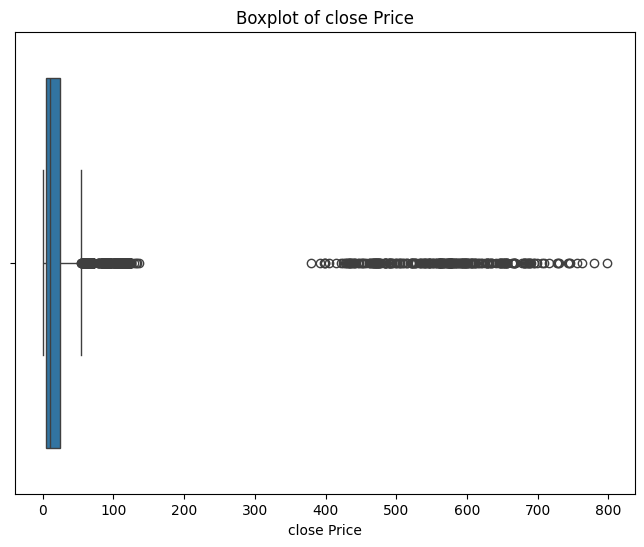

In [10]:
# Box plot to visualize outliers in the 'Close' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=stock_data['close'])
plt.title('Boxplot of close Price')
plt.xlabel('close Price')
plt.show()


4. Summarize statistics


In [11]:
print(stock_data.describe())

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7781.000000  7781.000000    7781.000000  7781.000000   
mean   7.586022e+05      46.869734    49.841327      47.078255    49.920269   
std    3.934491e+06      11.708649     4.954201       8.727150     3.336015   
min    0.000000e+

In [12]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


6. Distribution of Stock Prices:

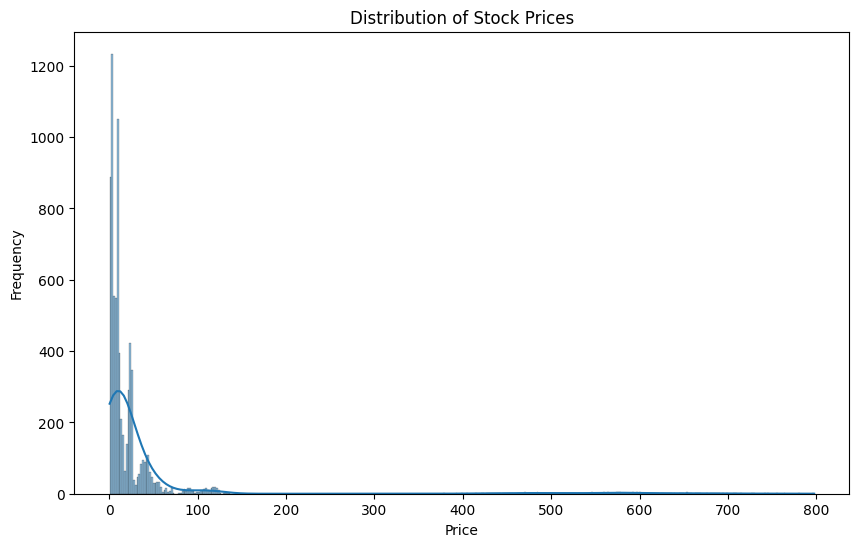

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['close'], kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

7. Daily Returns:

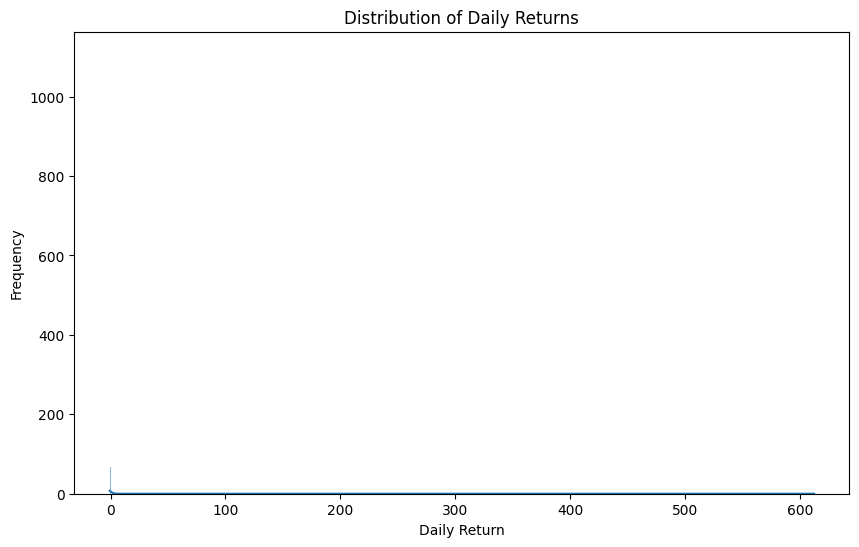

In [11]:
# Calculate daily returns
stock_data['daily return'] = stock_data['close'].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['daily return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

8. Correlation Analysis:

In [ ]:
# Select only numeric columns for correlation calculation
numeric_columns = stock_data.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



9. Volatility Analysis:

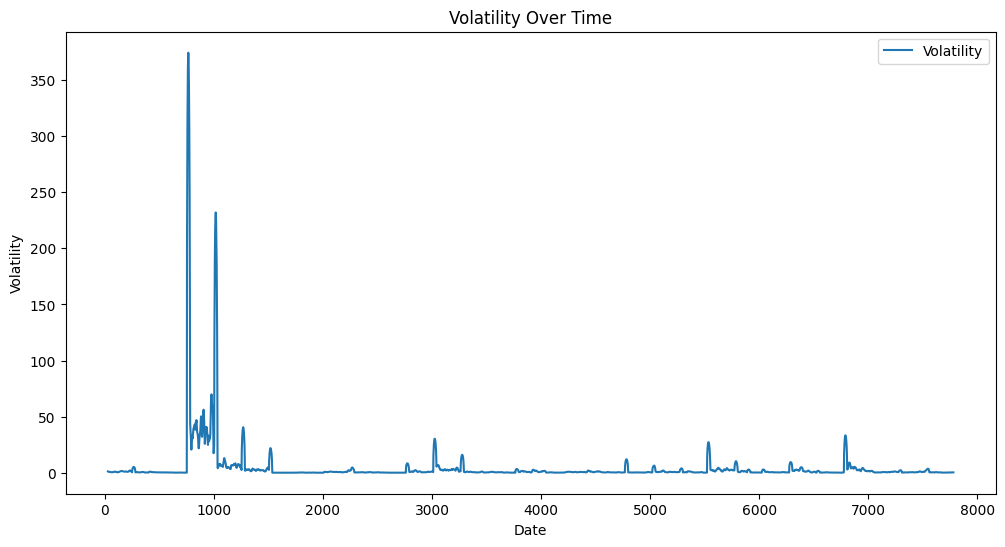

In [16]:
# Calculate rolling standard deviation (volatility)
window = 30  # Choose the rolling window size
stock_data['Volatility'] = stock_data['close'].rolling(window).std()

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Volatility'], label='Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


Scatter plot [close] vs [high]

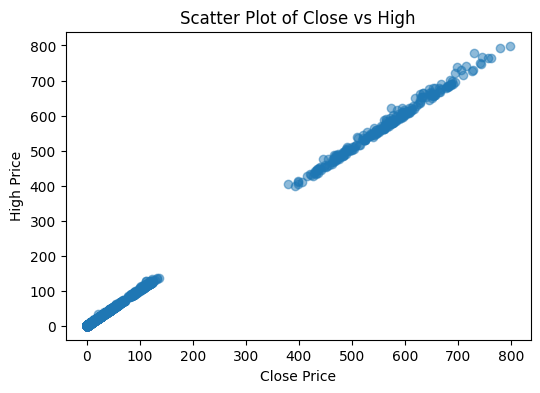

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(stock_data['close'], stock_data['high'], alpha=0.5)
plt.xlabel('Close Price')
plt.ylabel('High Price')
plt.title('Scatter Plot of Close vs High')
plt.show()

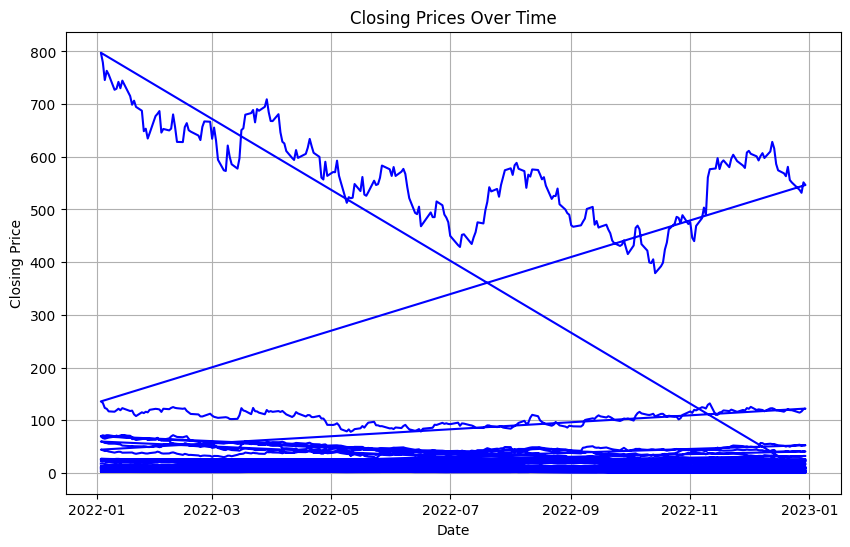

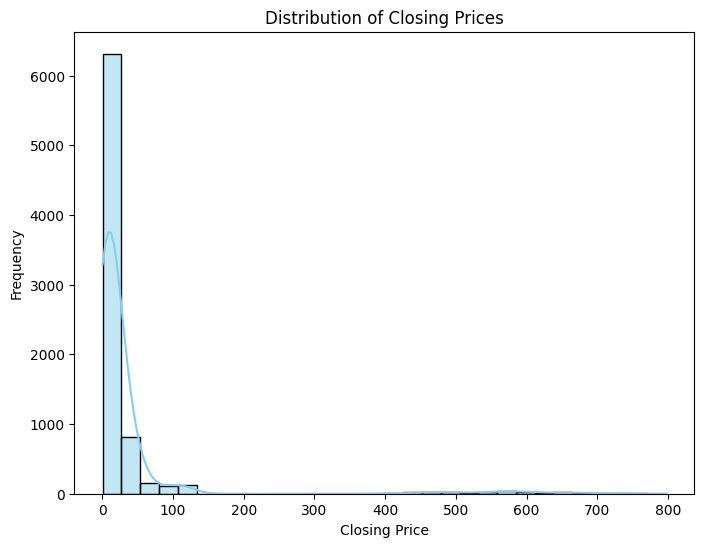

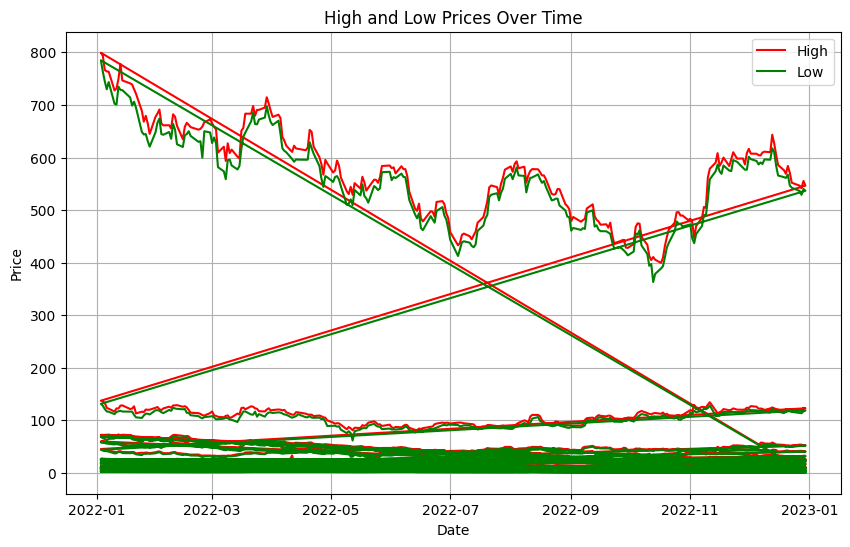

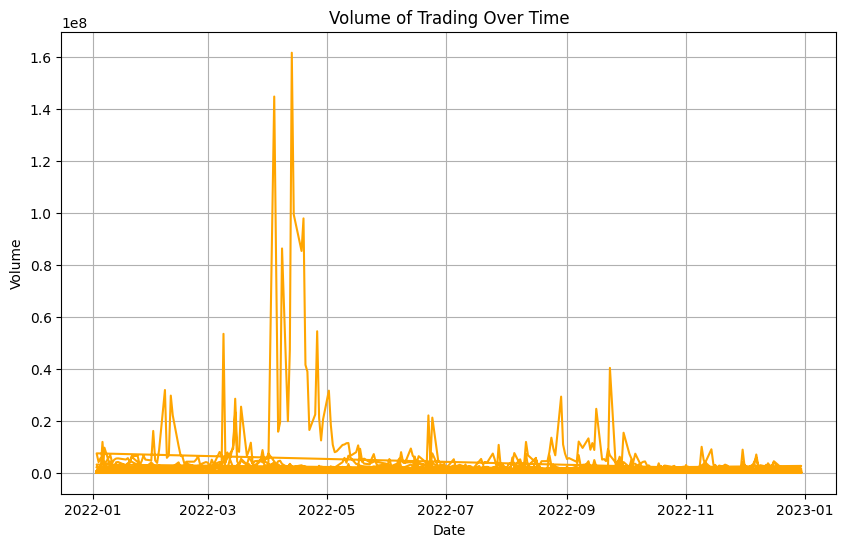

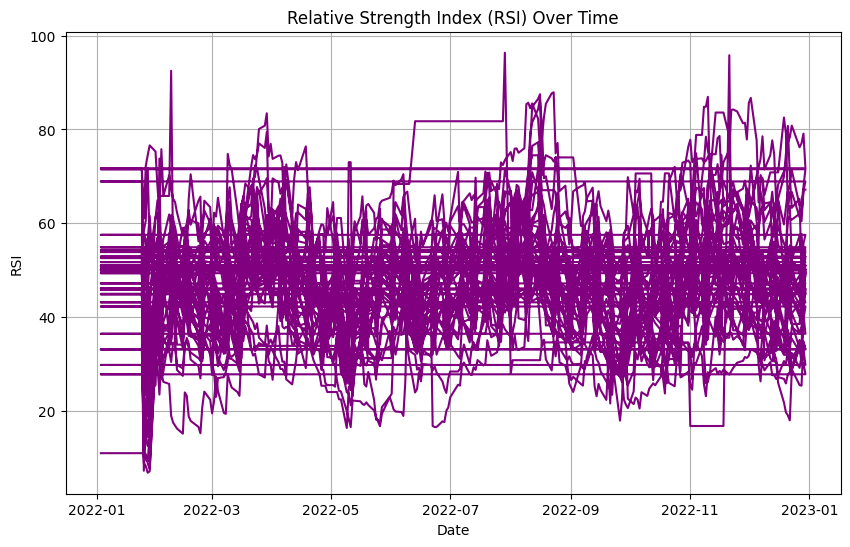

In [17]:
# Convert 'date' column to datetime type
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Set 'date' column as the index
stock_data.set_index('date', inplace=True)

# Plotting the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['close'], color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plotting the distribution of closing prices
plt.figure(figsize=(8, 6))
sns.histplot(stock_data['close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the trend of high and low prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['high'], label='High', color='red')
plt.plot(stock_data.index, stock_data['low'], label='Low', color='green')
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the volume of trading over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['volume'], color='orange')
plt.title('Volume of Trading Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Plotting the Relative Strength Index (RSI) over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['RSIadjclose15'], color='purple')
plt.title('Relative Strength Index (RSI) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()


MODEL SELECTION

LINEAR REGRESSION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df contains historical stock price data with features and target variable

# Prepare features and target variable
X = stock_data[['open', 'high', 'low', 'volume']]  # Features
y = stock_data['close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0350515890490934


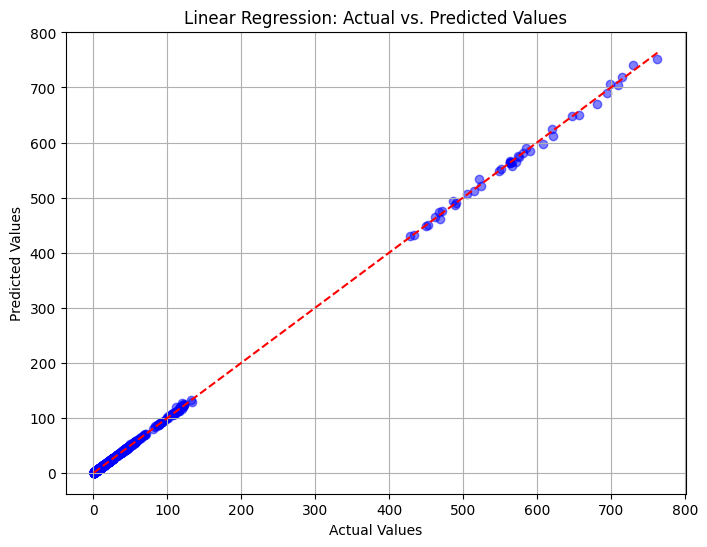

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.grid(True)
plt.show()